In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("master.csv").drop('Unnamed: 0',axis=1)

vars_not_model = ['anomes','anomes_real','ano']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 31 columns):
anomes                           58 non-null int64
numberCases                      58 non-null int64
anomes_real                      58 non-null int64
ano                              58 non-null int64
sarampo                          58 non-null float64
tosse                            58 non-null float64
febre                            58 non-null float64
coriza                           58 non-null float64
conjuntivite                     58 non-null float64
exantema_maculopapular           58 non-null float64
exantema                         58 non-null float64
manchas_de_Koplik                58 non-null float64
Koplik                           58 non-null float64
manchas_vermelhas_no_corpo       58 non-null float64
manchas_vermelhas                58 non-null float64
fotofobia                        58 non-null float64
triplice_viral_d1                58 non-null float64
trip

In [4]:
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,mortal_idade_5a9anos,mortalidade_infantil_ate9anos,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,244,3786,82.8,24.886737,40.0,0.0,100.0,10.0,101971173,106523727
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,228,3339,83.6,24.351927,39.0,0.0,100.0,10.0,101971173,106523727
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,236,3911,88.2,24.865532,40.4,0.0,100.0,10.0,101971173,106523727
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,281,3916,96.6,23.658929,41.9,-4.3,100.0,11.0,101971173,106523727
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,300,4075,87.4,22.121276,38.1,-5.1,100.0,8.0,101971173,106523727
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,272,3855,44.0,21.039745,43.3,-2.8,100.0,10.0,101971173,106523727
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,249,3776,49.8,21.321536,40.0,-5.7,100.0,6.0,101971173,106523727
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,233,3681,53.4,21.806076,44.7,-5.2,100.0,5.0,101971173,106523727
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,255,3549,87.0,23.801683,45.0,-6.2,100.0,7.0,101971173,106523727
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,255,3595,90.6,24.665965,45.0,0.4,100.0,10.0,101971173,106523727


## Estatistica Descritiva

In [5]:
df.describe()

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,mortal_idade_5a9anos,mortalidade_infantil_ate9anos,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,5.800000e+01,5.800000e+01
mean,201999.431034,684.431034,202006.500000,2019.931034,25.905172,47.884483,43.137931,47.591379,60.798276,11.665517,...,246.775862,3489.637931,72.400000,23.412748,41.546552,-9.779310,100.0,7.172414,1.034530e+08,1.081482e+08
std,139.784686,1303.144310,139.940746,1.400026,24.912751,21.605216,23.210071,23.848068,22.067423,16.597696,...,33.730637,300.010742,18.911354,1.632698,2.394820,16.964139,0.0,1.768515,1.058462e+06,1.161697e+06
min,201801.000000,2.000000,201802.000000,2018.000000,2.000000,17.750000,6.250000,4.750000,18.200000,0.000000,...,178.000000,2905.000000,34.400000,19.882524,37.400000,-51.600000,100.0,4.000000,1.019712e+08,1.065237e+08
25%,201903.250000,21.000000,201904.250000,2019.000000,6.250000,31.050000,32.812500,29.250000,49.100000,0.000000,...,225.750000,3260.250000,60.000000,21.839783,39.925000,-7.950000,100.0,7.000000,1.027603e+08,1.073868e+08
50%,202005.500000,70.000000,202006.500000,2020.000000,10.800000,42.450000,40.750000,51.250000,63.900000,0.000000,...,245.000000,3497.500000,75.400000,24.195568,41.450000,-4.000000,100.0,7.000000,1.035277e+08,1.082280e+08
75%,202107.750000,524.000000,202108.750000,2021.000000,47.687500,68.087500,60.437500,63.437500,77.000000,16.262500,...,270.750000,3695.250000,85.450000,24.742219,44.050000,0.000000,100.0,7.000000,1.042718e+08,1.090458e+08
max,202210.000000,5962.000000,202211.000000,2022.000000,90.500000,90.500000,94.000000,92.000000,96.000000,69.800000,...,350.000000,4115.000000,138.200000,25.741640,45.000000,6.000000,100.0,11.000000,1.049905e+08,1.098381e+08


<function matplotlib.pyplot.show(*args, **kw)>

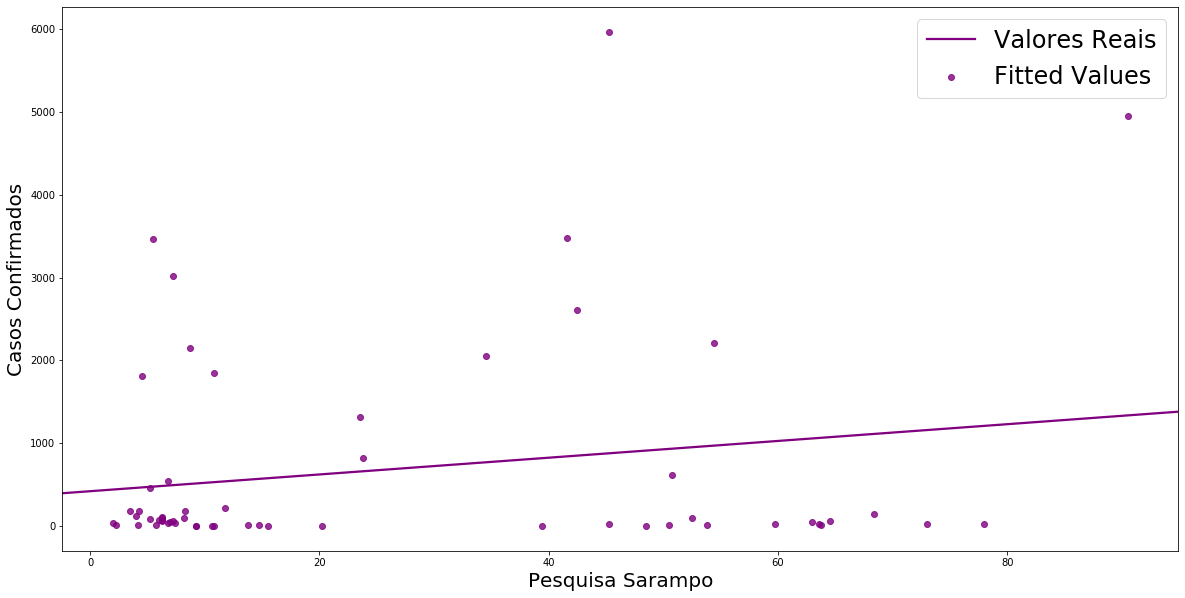

In [6]:
# In[ ]: Gráfico de dispersão

#Regressão linear que melhor se adequa às obeservações: função 'sns.regplot'

plt.figure(figsize=(20,10))
sns.regplot(data=df, x='sarampo', y='numberCases', ci=False, color='purple')
plt.xlabel('Pesquisa Sarampo', fontsize=20)
plt.ylabel('Casos Confirmados', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

## Modelo Regressao Linear Simples

In [7]:
# In[ ]: Estimação do modelo de regressão linear simples

#Estimação do modelo
modelo = sm.OLS.from_formula("numberCases ~ sarampo", df).fit()

In [8]:
#Observação dos parâmetros resultantes da estimação
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            numberCases   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.169
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.146
Time:                        18:20:13   Log-Likelihood:                -496.70
No. Observations:                  58   AIC:                             997.4
Df Residuals:                      56   BIC:                             1002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    422.7535    245.472      1.722      0.091     -68.987     914.493
sarampo       10.1014      6.858      1.473      0.146      -3.638      23.840
==============================================================================
Omnibus:                       36.398   Durbin-Watson:                   0.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.067
Skew:                           2.047   Prob(JB):                     6.77e-18
Kurtosis:                       6.996   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
df['yhat'] = modelo.fittedvalues
df['erro'] = modelo.resid
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres,yhat,erro
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,82.8,24.886737,40.0,0.0,100.0,10.0,101971173,106523727,445.481524,-424.481524
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,83.6,24.351927,39.0,0.0,100.0,10.0,101971173,106523727,465.684252,-276.684252
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,88.2,24.865532,40.4,0.0,100.0,10.0,101971173,106523727,506.089709,-322.089709
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,96.6,23.658929,41.9,-4.3,100.0,11.0,101971173,106523727,491.442731,52.557269
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,87.4,22.121276,38.1,-5.1,100.0,8.0,101971173,106523727,468.209593,1339.790407
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,44.0,21.039745,43.3,-2.8,100.0,10.0,101971173,106523727,478.310958,2984.689042
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,49.8,21.321536,40.0,-5.7,100.0,6.0,101971173,106523727,972.267664,1238.732336
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,53.4,21.806076,44.7,-5.2,100.0,5.0,101971173,106523727,935.397685,-321.397685
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,87.0,23.801683,45.0,-6.2,100.0,7.0,101971173,106523727,541.949552,-316.949552
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,90.6,24.665965,45.0,0.4,100.0,10.0,101971173,106523727,493.463004,-440.463004


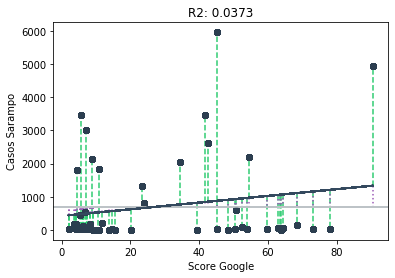

In [10]:
y = df['numberCases']
yhat = df['yhat']
x = df['sarampo']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(modelo.rsquared,4)))
    plt.xlabel("Score Google")
    plt.ylabel("Casos Sarampo")
plt.show()

In [13]:
#Nível de significância de 5% / Nível de confiança de 95%
modelo.conf_int(alpha=0.05)

,0,1
Intercept,-68.986552,914.493461
sarampo,-3.637701,23.840430


## Modelo Regressao Linear Multipla

In [106]:
# In[ ]: Gráfico 3D com scatter

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Scatter3d(
    x=df['sarampo'], 
    y=df['febre'], 
    z=df['numberCases'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict(
                        xaxis_title='Score Sarampo',
                        yaxis_title='Score Febre',
                        zaxis_title='Casos Sarampo'))
plot_figure.show()

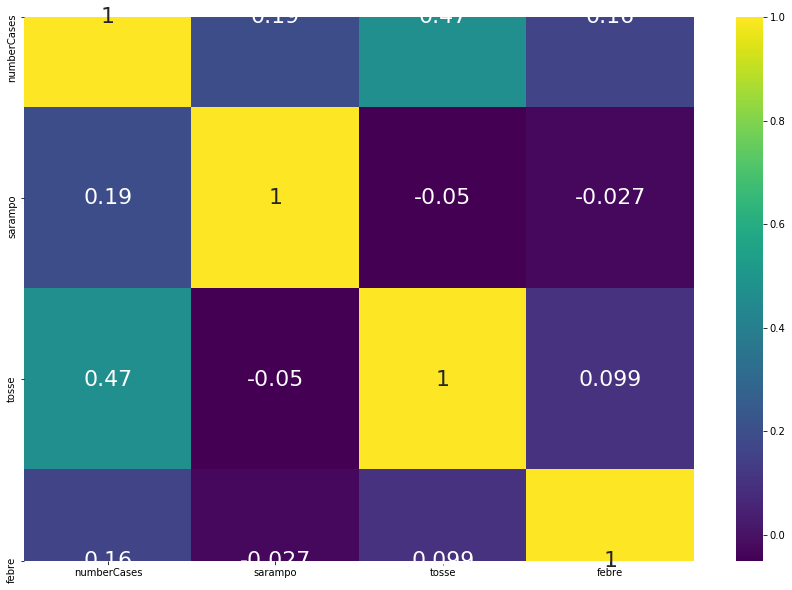

In [15]:
# In[ ]: Matriz de correlações

df_corr = df[['numberCases','sarampo','tosse','febre']]
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

#Palettes de cores
#sns.color_palette("viridis", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("inferno", as_cmap=True)
#sns.color_palette("Blues", as_cmap=True)
#sns.color_palette("Greens", as_cmap=True)
#sns.color_palette("Reds", as_cmap=True)

<Figure size 1080x720 with 0 Axes>

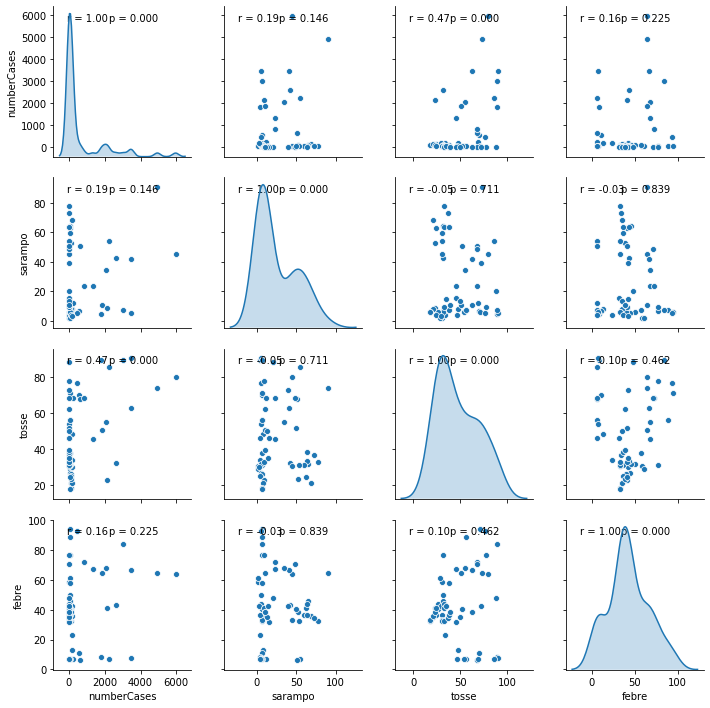

In [16]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_corr, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [105]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_mult1 = sm.OLS.from_formula("bc_numberCases ~ sarampo + febre + tosse", df).fit()

In [106]:
#Parâmetros do modelo
modelo_mult1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_numberCases   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.163
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.333
Time:                        20:45:51   Log-Likelihood:                -107.73
No. Observations:                  58   AIC:                             223.5
Df Residuals:                      54   BIC:                             231.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7921      0.674      4.143      0.000       1.441       4.143
sarampo        0.0042      0.009      0.494      0.623      -0.013       0.021
febre          0.0019      0.009      0.207      0.837      -0.017       0.020
tosse          0.0177      0.010      1.784      0.080      -0.002       0.038
==============================================================================
Omnibus:                        2.236   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                2.149
Skew:                          -0.405   Prob(JB):                        0.341
Kurtosis:                       2.517   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_mult1 = stepwise(modelo_mult1, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_numberCases ~ sarampo + febre + tosse

 Discarding atribute "febre" with p-value equal to 0.8371724798690414 

Estimating model...: 
 bc_numberCases ~ sarampo + tosse

 Discarding atribute "sarampo" with p-value equal to 0.6235396467033112 

Estimating model...: 
 bc_numberCases ~ tosse

 Discarding atribute "tosse" with p-value equal to 0.0743263706841433 

Estimating model...: 
 bc_numberCases ~ 


PatsyError: expected a noun, but instead the expression ended
    bc_numberCases ~
                   ^

## Modelo Regressao Linear Multipla - 2

In [6]:
#proximo modelo de regressao linear multipla

#termos do google: coriza, conjuntivite, exantema maculopapular, manchas de Koplik (pequenos pontos brancos na mucosa oral), descamação furfurácea (as manchas tornam-se escurecidas e surge descamação fina, lembrando farinha)
#fotofobia
#https://rmmg.org/artigo/detalhes/2629

#manchas vermelhas no corpo
#https://www.saude.ba.gov.br/suvisa/vigilancia-epidemiologica/doencas-imunopreveniveis/doencas-exantematicas/#:~:text=%C3%89%20uma%20doen%C3%A7a%20infecciosa%20aguda,%2C%20espirrar%2C%20falar%20ou%20respirar.

termos = ['sarampo','tosse','febre','coriza','conjuntivite','exantema maculopapular','exantema','manchas de Koplik','Koplik','manchas vermelhas no corpo','manchas vermelhas','fotofobia']

In [7]:
# Add Box-Cox para fazer y ficar mais aderente a normalidade

# In[ ]: Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#x é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
x, lmbda = boxcox(df['numberCases'])

#Inserindo a variável transformada ('bc_comprimento') no dataset
#para a estimação de um novo modelo
df['bc_numberCases'] = x

In [8]:
lmbda

-0.06423194447658437

In [9]:
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,mortalidade_infantil_ate9anos,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres,bc_numberCases
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,3786,82.8,24.886737,40.0,0.0,100.0,10.0,101971173,106523727,2.765328
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,3339,83.6,24.351927,39.0,0.0,100.0,10.0,101971173,106523727,4.450560
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,3911,88.2,24.865532,40.4,0.0,100.0,10.0,101971173,106523727,4.431396
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,3916,96.6,23.658929,41.9,-4.3,100.0,11.0,101971173,106523727,5.180478
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,4075,87.4,22.121276,38.1,-5.1,100.0,8.0,101971173,106523727,5.951730
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,3855,44.0,21.039745,43.3,-2.8,100.0,10.0,101971173,106523727,6.344923
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,3776,49.8,21.321536,40.0,-5.7,100.0,6.0,101971173,106523727,6.075227
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,3681,53.4,21.806076,44.7,-5.2,100.0,5.0,101971173,106523727,5.260932
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,3549,87.0,23.801683,45.0,-6.2,100.0,7.0,101971173,106523727,4.574376
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,3595,90.6,24.665965,45.0,0.4,100.0,10.0,101971173,106523727,3.504466


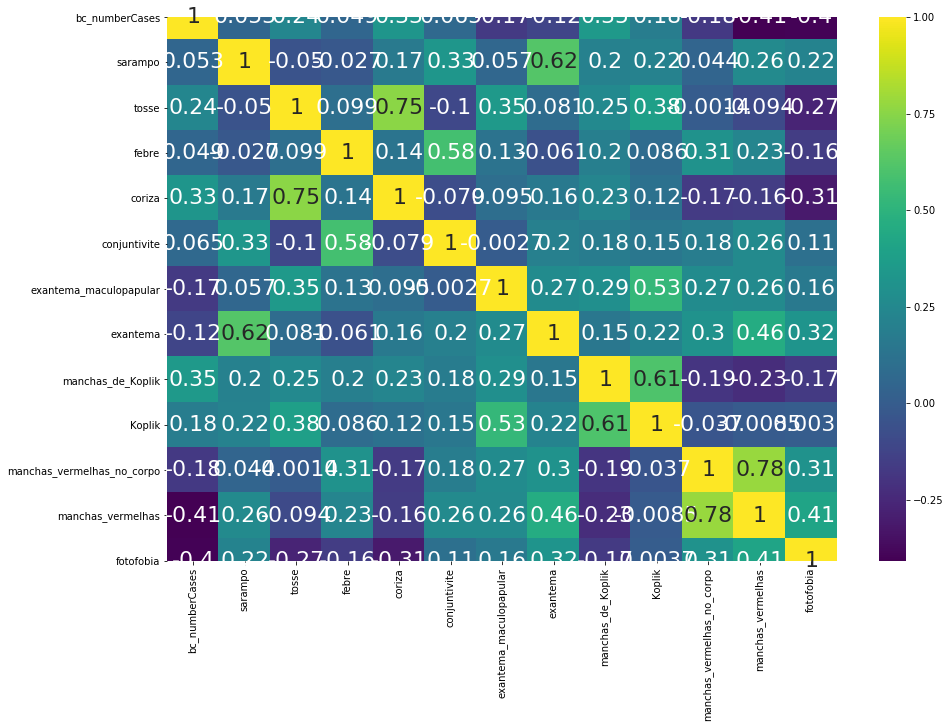

In [39]:
# In[ ]: Matriz de correlações

df_corr = df[['bc_numberCases','sarampo','tosse','febre','coriza',
              'conjuntivite', 'exantema_maculopapular', 'exantema',
              'manchas_de_Koplik', 'Koplik', 'manchas_vermelhas_no_corpo',
              'manchas_vermelhas', 'fotofobia']]
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

#Palettes de cores
#sns.color_palette("viridis", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("inferno", as_cmap=True)
#sns.color_palette("Blues", as_cmap=True)
#sns.color_palette("Greens", as_cmap=True)
#sns.color_palette("Reds", as_cmap=True)

<Figure size 1080x720 with 0 Axes>

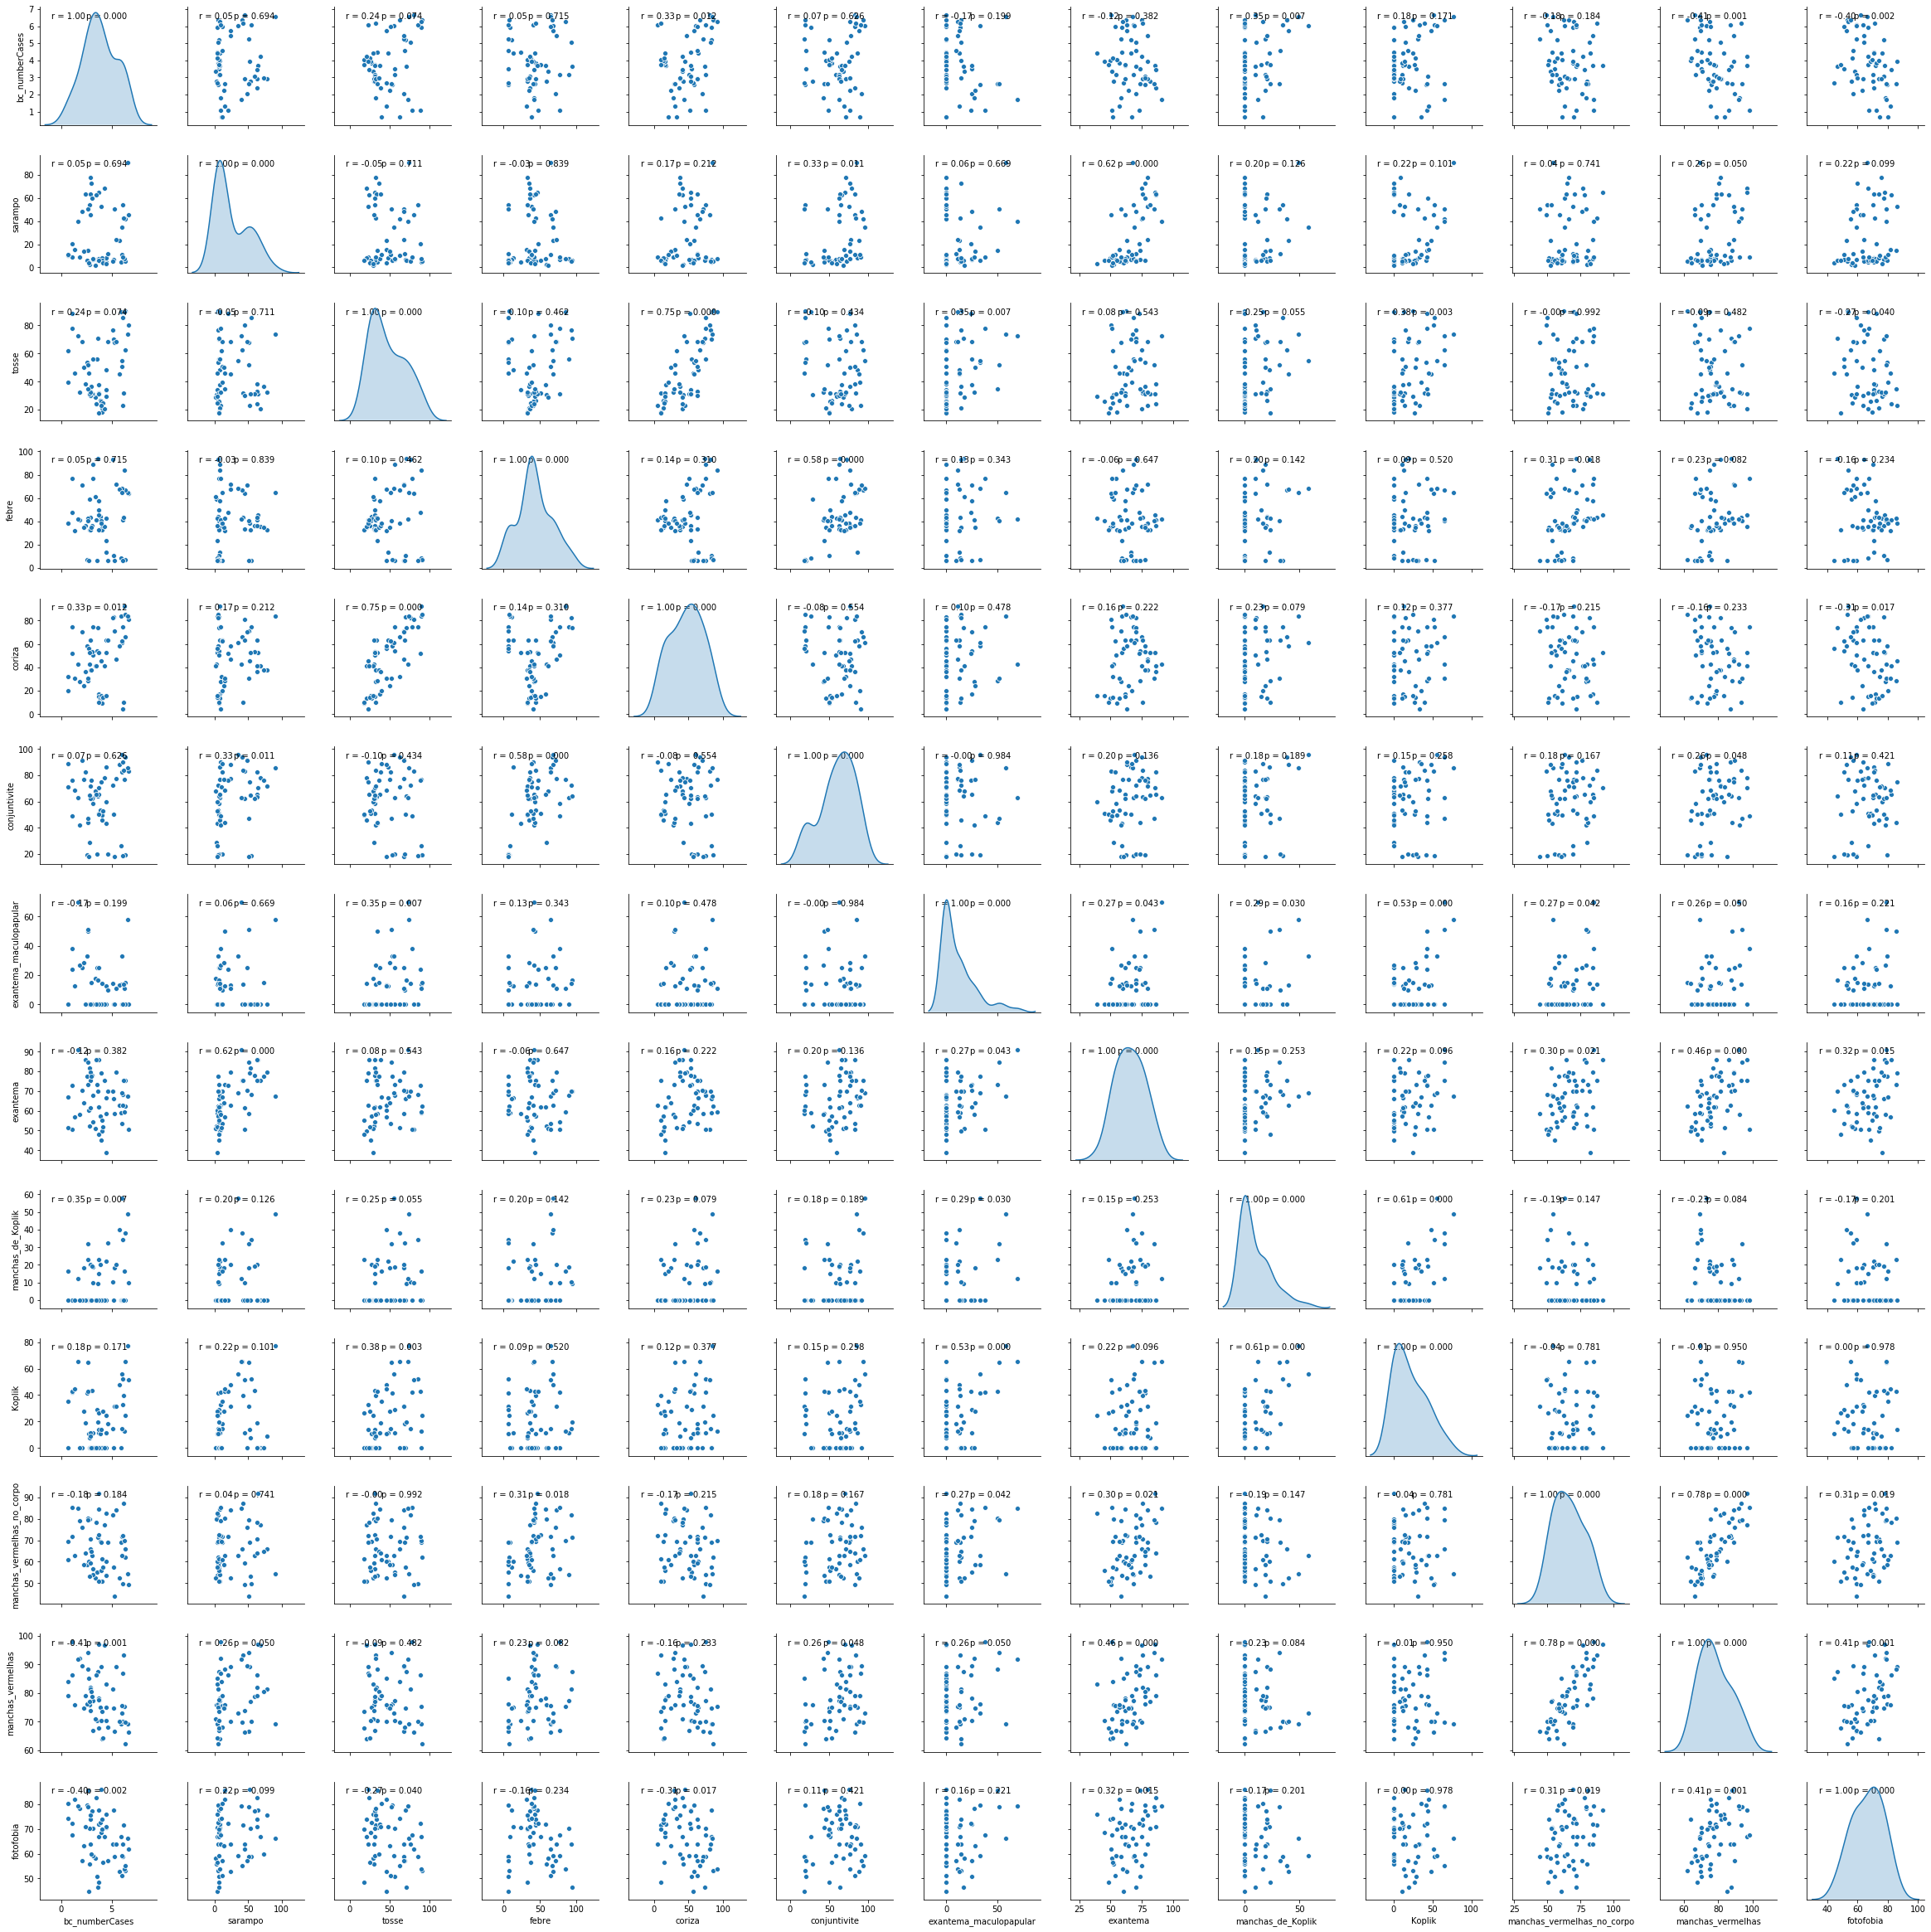

In [40]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_corr, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [10]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_mult = sm.OLS.from_formula("bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia", df).fit()


In [11]:
#Parâmetros do modelo
modelo_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_numberCases   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     3.496
Date:                Wed, 10 Apr 2024   Prob (F-statistic):            0.00109
Time:                        12:47:54   Log-Likelihood:                -90.447
No. Observations:                  58   AIC:                             206.9
Df Residuals:                      45   BIC:                             233.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.6143      2.108      4.086      0.000       4.369      12.860
sarampo                        0.0057      0.010      0.542      0.590      -0.015       0.027
febre                         -0.0151      0.012     -1.280      0.207      -0.039       0.009
tosse                         -0.0128      0.016     -0.774      0.443      -0.046       0.020
coriza                         0.0266      0.015      1.804      0.078      -0.003       0.056
conjuntivite                   0.0151      0.012      1.295      0.202      -0.008       0.039
exantema_maculopapular        -0.0227      0.014     -1.604      0.116      -0.051       0.006
exantema                      -0.0168      0.023     -0.745      0.460      -0.062       0.029
manchas_de_Koplik              0.0191      0.017      1.101      0.277      -0.016       0.054
Koplik                         0.0181      0.013      1.361      0.180      -0.009       0.045
manchas_vermelhas_no_corpo     0.0831      0.027      3.091      0.003       0.029       0.137
manchas_vermelhas             -0.1053      0.036     -2.959      0.005      -0.177      -0.034
fotofobia                     -0.0351      0.021     -1.700      0.096      -0.077       0.006
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.153
Skew:                          -0.053   Prob(JB):                        0.926
Kurtosis:                       2.772   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_mult.conf_int(alpha=0.05)

,0,1
Intercept,4.368510,12.860116
sarampo,-0.015418,0.026773
febre,-0.038970,0.008679
tosse,-0.045986,0.020459
coriza,-0.003100,0.056323
conjuntivite,-0.008371,0.038537
exantema_maculopapular,-0.051276,0.005804
exantema,-0.062253,0.028628
manchas_de_Koplik,-0.015867,0.054120
Koplik,-0.008676,0.044793


In [13]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_mult = stepwise(modelo_mult, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia

 Discarding atribute "sarampo" with p-value equal to 0.5904580337469719 

Estimating model...: 
 bc_numberCases ~ febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia

 Discarding atribute "exantema" with p-value equal to 0.5673237365952268 

Estimating model...: 
 bc_numberCases ~ febre + tosse + coriza + conjuntivite + exantema_maculopapular + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia

 Discarding atribute "tosse" with p-value equal to 0.37150493434188336 

Estimating model...: 
 bc_numberCases ~ febre + coriza + conjuntivite + exantema_maculopapular + manchas_de_Koplik + Koplik + manchas_vermelh

In [45]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_mult.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9652488828637534,
 'statistics z': 1.3560871810184283,
 'p-value': 0.0875357155129895}

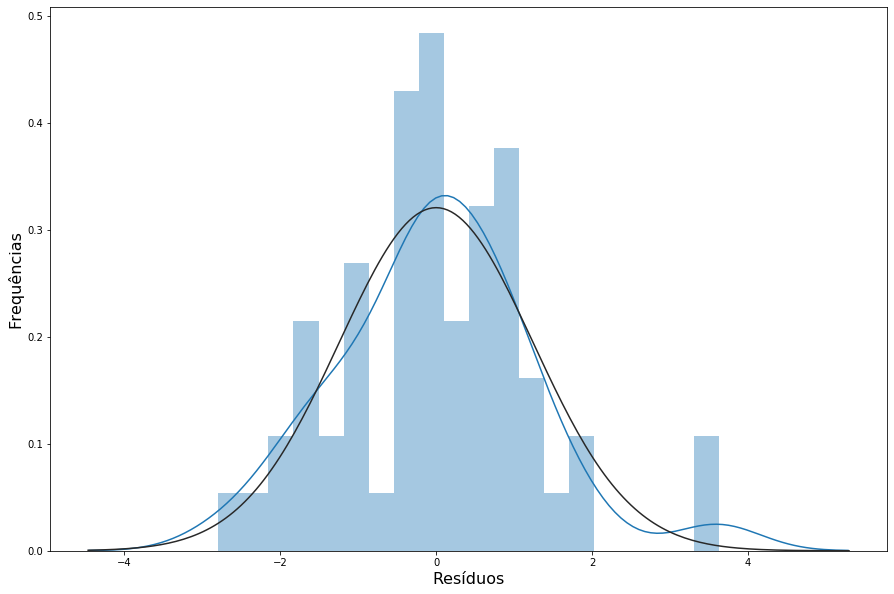

In [46]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_mult.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [47]:
summary_col([modelo, modelo_step_mult],
            model_names=["SIMPLES","MULTIPLA"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,SIMPLES,MULTIPLA
Intercept,422.7535*,6.6909***
,(245.4723),(1.7228)
coriza,,0.0176**
,,(0.0076)
exantema_maculopapular,,-0.0249**
,,(0.0118)
manchas_de_Koplik,,0.0356**
,,(0.0137)
manchas_vermelhas,,-0.1010***
,,(0.0307)


In [14]:
# df.drop(['yhat','erro','yhat_simples','yhat_step_mult'],axis = 1,inplace=True)

# df['yhat_simples'] = modelo.fittedvalues
df['yhat_step_mult_bc'] = (modelo_step_mult.fittedvalues * lmbda + 1) ** (1 / lmbda)


In [15]:
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres,bc_numberCases,yhat_step_mult_bc
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,82.8,24.886737,40.0,0.0,100.0,10.0,101971173,106523727,2.765328,302.109114
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,83.6,24.351927,39.0,0.0,100.0,10.0,101971173,106523727,4.450560,86.350165
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,88.2,24.865532,40.4,0.0,100.0,10.0,101971173,106523727,4.431396,194.896998
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,96.6,23.658929,41.9,-4.3,100.0,11.0,101971173,106523727,5.180478,129.287367
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,87.4,22.121276,38.1,-5.1,100.0,8.0,101971173,106523727,5.951730,510.484082
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,44.0,21.039745,43.3,-2.8,100.0,10.0,101971173,106523727,6.344923,775.480099
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,49.8,21.321536,40.0,-5.7,100.0,6.0,101971173,106523727,6.075227,583.871178
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,53.4,21.806076,44.7,-5.2,100.0,5.0,101971173,106523727,5.260932,240.540083
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,87.0,23.801683,45.0,-6.2,100.0,7.0,101971173,106523727,4.574376,2518.589452
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,90.6,24.665965,45.0,0.4,100.0,10.0,101971173,106523727,3.504466,44.587051


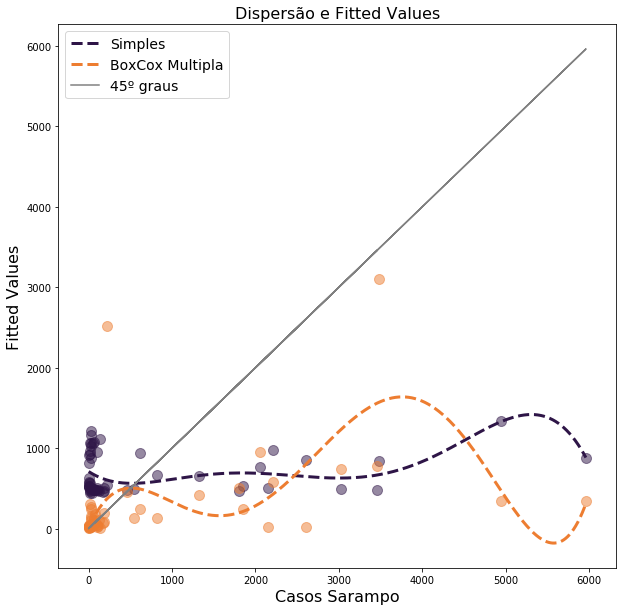

In [53]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df['numberCases']
ydata_simp = df['yhat_simples']
ydata_mult = df['yhat_step_mult_bc']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_simp)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_simp, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_mult, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Casos Sarampo', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Simples','BoxCox Multipla','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [54]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['coriza','exantema_maculopapular','manchas_de_Koplik','manchas_vermelhas_no_corpo','manchas_vermelhas']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

/Users/brunaoliveira/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF,Tolerance
const,99.740268,0.010026
coriza,1.082478,0.923806
exantema_maculopapular,1.267256,0.789106
manchas_de_Koplik,1.257440,0.795267
manchas_vermelhas_no_corpo,2.628655,0.380423
manchas_vermelhas,2.667991,0.374814


In [55]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade


# Criação da função 'breusch_pagan_test'

from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value


# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_mult)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!

chisq: 2.8794863625157308
p-value: 0.1114320267154953


(2.8794863625157308, 0.1114320267154953)

## Modelo Regressao Linear Multipla - 3

In [ ]:
#proximo modelo de regressao linear multipla

#todos os dados

In [ ]:
#Usar BoxCox

In [56]:
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,temp_avg,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres,bc_numberCases,yhat_step_mult_bc,yhat_simples
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,24.886737,40.0,0.0,100.0,10.0,101971173,106523727,2.765328,302.109114,445.481524
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,24.351927,39.0,0.0,100.0,10.0,101971173,106523727,4.450560,86.350165,465.684252
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,24.865532,40.4,0.0,100.0,10.0,101971173,106523727,4.431396,194.896998,506.089709
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,23.658929,41.9,-4.3,100.0,11.0,101971173,106523727,5.180478,129.287367,491.442731
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,22.121276,38.1,-5.1,100.0,8.0,101971173,106523727,5.951730,510.484082,468.209593
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,21.039745,43.3,-2.8,100.0,10.0,101971173,106523727,6.344923,775.480099,478.310958
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,21.321536,40.0,-5.7,100.0,6.0,101971173,106523727,6.075227,583.871178,972.267664
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,21.806076,44.7,-5.2,100.0,5.0,101971173,106523727,5.260932,240.540083,935.397685
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,23.801683,45.0,-6.2,100.0,7.0,101971173,106523727,4.574376,2518.589452,541.949552
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,24.665965,45.0,0.4,100.0,10.0,101971173,106523727,3.504466,44.587051,493.463004


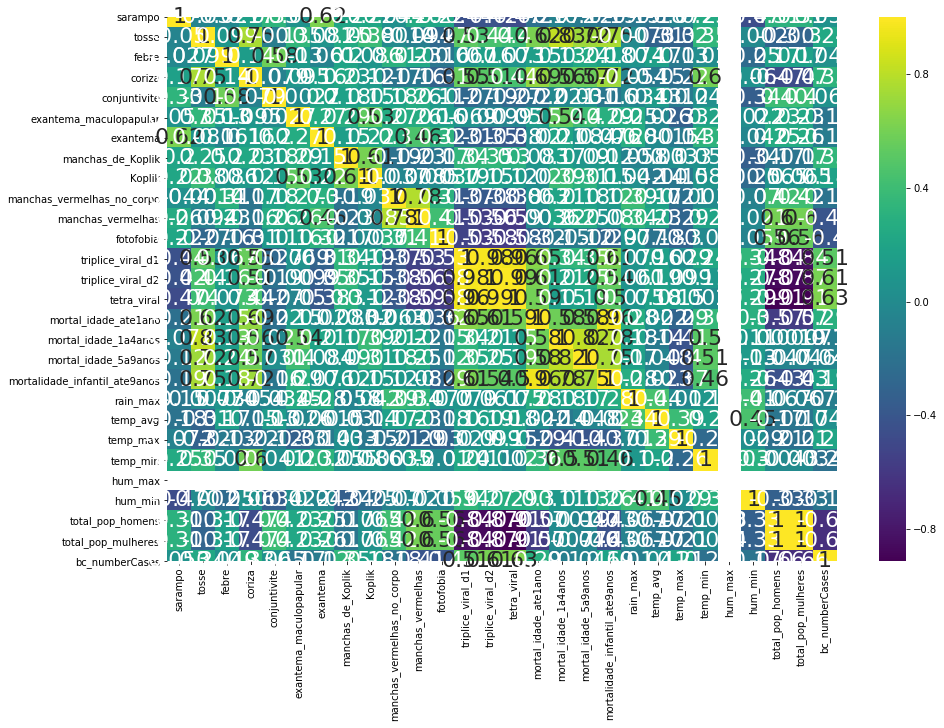

In [65]:
# In[ ]: Matriz de correlações

df_corr = df.drop(['anomes','anomes_real','ano','numberCases','yhat_step_mult_bc','yhat_simples'],axis = 1)
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

#Palettes de cores
#sns.color_palette("viridis", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("inferno", as_cmap=True)
#sns.color_palette("Blues", as_cmap=True)
#sns.color_palette("Greens", as_cmap=True)
#sns.color_palette("Reds", as_cmap=True)

In [16]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_mult_all = sm.OLS.from_formula("bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia + triplice_viral_d1 + triplice_viral_d2 + tetra_viral + mortal_idade_ate1ano + mortal_idade_1a4anos + mortal_idade_5a9anos + mortalidade_infantil_ate9anos + rain_max + temp_avg + temp_max + temp_min + hum_max + hum_min + total_pop_homens + total_pop_mulheres", df).fit()


In [17]:
#Parâmetros do modelo
modelo_mult_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_numberCases   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     9.095
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.12e-08
Time:                        12:50:44   Log-Likelihood:                -50.677
No. Observations:                  58   AIC:                             151.4
Df Residuals:                      33   BIC:                             202.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.0001   7.99e-05     -1.346      0.187      -0.000     5.5e-05
sarampo                           0.0308      0.011      2.699      0.011       0.008       0.054
febre                            -0.0475      0.013     -3.721      0.001      -0.073      -0.022
tosse                            -0.0220      0.019     -1.143      0.261      -0.061       0.017
coriza                            0.0583      0.021      2.788      0.009       0.016       0.101
conjuntivite                      0.0132      0.009      1.551      0.130      -0.004       0.031
exantema_maculopapular           -0.0113      0.010     -1.104      0.277      -0.032       0.010
exantema                          0.0301      0.022      1.346      0.187      -0.015       0.076
manchas_de_Koplik                 0.0006      0.013      0.049      0.962      -0.025       0.026
Koplik                           -0.0048      0.010     -0.486      0.630      -0.025       0.015
manchas_vermelhas_no_corpo        0.0671      0.019      3.531      0.001       0.028       0.106
manchas_vermelhas                -0.0619      0.036     -1.742      0.091      -0.134       0.010
fotofobia                        -0.0151      0.018     -0.834      0.411      -0.052       0.022
triplice_viral_d1                -0.8204      0.257     -3.194      0.003      -1.343      -0.298
triplice_viral_d2                -0.3250      0.357     -0.910      0.369      -1.051       0.401
tetra_viral                       1.2318      0.470      2.619      0.013       0.275       2.189
mortal_idade_ate1ano             -0.0006      0.002     -0.252      0.803      -0.005       0.004
mortal_idade_1a4anos             -0.0026      0.005     -0.551      0.585      -0.012       0.007
mortal_idade_5a9anos              0.0039      0.005      0.713      0.481      -0.007       0.015
mortalidade_infantil_ate9anos     0.0007      0.002      0.398      0.693      -0.003       0.004
rain_max                         -0.0142      0.008     -1.765      0.087      -0.031       0.002
temp_avg                          0.1336      0.155      0.863      0.394      -0.181       0.448
temp_max                         -0.0811      0.073     -1.117      0.272      -0.229       0.067
temp_min                          0.0320      0.031      1.041      0.305      -0.031       0.095
hum_max                          -0.0108      0.008     -1.346      0.187      -0.027       0.006
hum_min                          -0.0448      0.116     -0.387      0.701      -0.280       0.191
total_pop_homens              -6.419e-05   2.49e-05     -2.574      0.015      -0.000   -1.34e-05
total_pop_mulheres             6.205e-05    2.4e-05      2.586      0.014    1.32e-05       0.000
=============================================

In [68]:
#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_mult_all.conf_int(alpha=0.05)

,0,1
Intercept,-0.000270,0.000055
sarampo,0.007579,0.053979
febre,-0.073400,-0.021509
tosse,-0.061236,0.017188
coriza,0.015750,0.100772
conjuntivite,-0.004131,0.030623
exantema_maculopapular,-0.032077,0.009506
exantema,-0.015379,0.075570
manchas_de_Koplik,-0.025199,0.026430
Koplik,-0.025000,0.015362


In [18]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_mult_all = stepwise(modelo_mult_all, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia + triplice_viral_d1 + triplice_viral_d2 + tetra_viral + mortal_idade_ate1ano + mortal_idade_1a4anos + mortal_idade_5a9anos + mortalidade_infantil_ate9anos + rain_max + temp_avg + temp_max + temp_min + hum_max + hum_min + total_pop_homens + total_pop_mulheres

 Discarding atribute "manchas_de_Koplik" with p-value equal to 0.9615996292645723 

Estimating model...: 
 bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia + triplice_viral_d1 + triplice_viral_d2 + tetra_viral + mortal_idade_ate1ano + mortal_idade_1a4anos + mortal_idade_5a9anos + mortalidade_infantil_ate9anos + rain_max + temp_avg + temp_max + temp_min + hum_max + hum_min + tota

In [70]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_mult_all.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9851115442163859,
 'statistics z': -0.2613835824646825,
 'p-value': 0.6031016418087956}

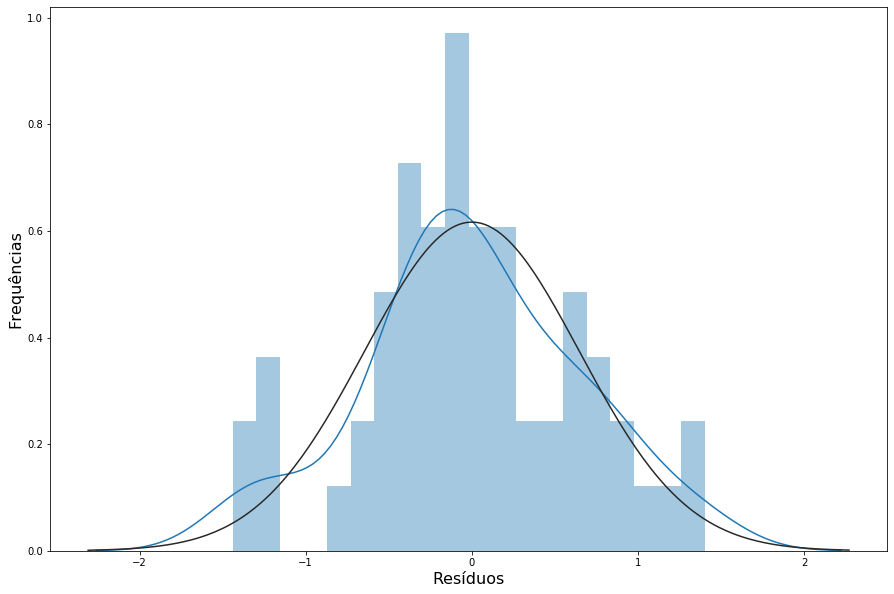

In [71]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_mult_all.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [72]:
summary_col([modelo, modelo_step_mult, modelo_step_mult_all],
            model_names=["SIMPLES","MULTIPLA","MULTIPLA_ALL"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,SIMPLES,MULTIPLA,MULTIPLA_ALL
Intercept,422.7535*,6.6909***,-97.6256**
,(245.4723),(1.7228),(40.1262)
conjuntivite,,,0.0195***
,,,(0.0062)
coriza,,0.0176**,0.0271***
,,(0.0076),(0.0082)
exantema_maculopapular,,-0.0249**,
,,(0.0118),
febre,,,-0.0356***
,,,(0.0077)


In [19]:

# df['yhat_simples'] = modelo.fittedvalues
# df['yhat_step_mult_bc'] = (modelo_step_mult.fittedvalues * lmbda + 1) ** (1 / lmbda)
df['yhat_step_mult_all_bc'] = (modelo_step_mult_all.fittedvalues * lmbda + 1) ** (1 / lmbda)

In [74]:
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres,bc_numberCases,yhat_step_mult_bc,yhat_simples,yhat_step_mult_all_bc
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,40.0,0.0,100.0,10.0,101971173,106523727,2.765328,302.109114,445.481524,20.194273
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,39.0,0.0,100.0,10.0,101971173,106523727,4.450560,86.350165,465.684252,52.078347
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,40.4,0.0,100.0,10.0,101971173,106523727,4.431396,194.896998,506.089709,649.906633
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,41.9,-4.3,100.0,11.0,101971173,106523727,5.180478,129.287367,491.442731,386.902086
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,38.1,-5.1,100.0,8.0,101971173,106523727,5.951730,510.484082,468.209593,505.690097
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,43.3,-2.8,100.0,10.0,101971173,106523727,6.344923,775.480099,478.310958,688.874214
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,40.0,-5.7,100.0,6.0,101971173,106523727,6.075227,583.871178,972.267664,1235.209654
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,44.7,-5.2,100.0,5.0,101971173,106523727,5.260932,240.540083,935.397685,606.497771
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,45.0,-6.2,100.0,7.0,101971173,106523727,4.574376,2518.589452,541.949552,272.828457
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,45.0,0.4,100.0,10.0,101971173,106523727,3.504466,44.587051,493.463004,69.173842


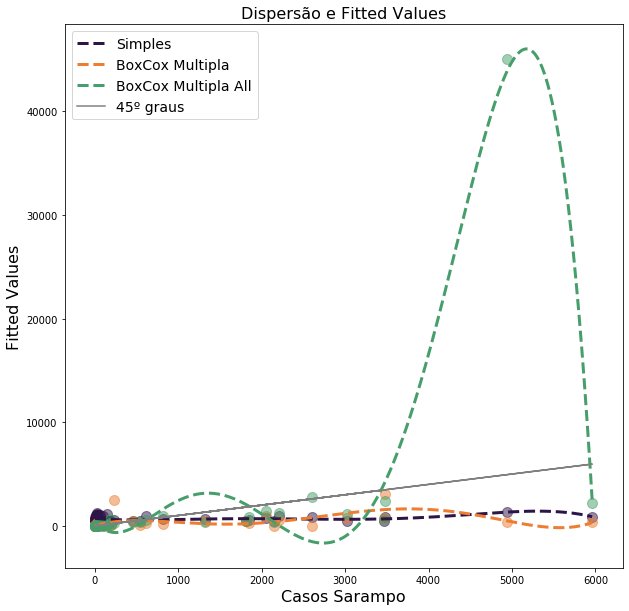

In [75]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df['numberCases']
ydata_simp = df['yhat_simples']
ydata_mult = df['yhat_step_mult_bc']
ydata_mult_all = df['yhat_step_mult_all_bc']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_simp)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult_all)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#469e6a', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_simp, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_mult, alpha=0.5, s=100, color='#ed7d31')
plt.scatter(xdata,ydata_mult_all, alpha=0.5, s=100, color='#469e6a')
plt.xlabel('Casos Sarampo', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Simples','BoxCox Multipla','BoxCox Multipla All','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [76]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['sarampo','febre','coriza','conjuntivite','manchas_vermelhas_no_corpo','triplice_viral_d1','tetra_viral','rain_max','total_pop_mulheres']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

/Users/brunaoliveira/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF,Tolerance
const,184607.901421,0.000005
sarampo,2.179717,0.458775
febre,3.614857,0.276636
coriza,4.329899,0.230952
conjuntivite,2.129859,0.469515
manchas_vermelhas_no_corpo,1.809062,0.552773
triplice_viral_d1,43.898460,0.022780
tetra_viral,93.402574,0.010706
rain_max,1.374681,0.727441
total_pop_mulheres,24.661388,0.040549


In [ ]:
#Removendo variaveis com alto VIF
#triplice_viral_d1, tetra_viral, total_pop_mulheres, hum_max

In [20]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_mult_all2 = sm.OLS.from_formula("bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia + triplice_viral_d2 + mortal_idade_ate1ano + mortal_idade_1a4anos + mortal_idade_5a9anos + mortalidade_infantil_ate9anos + rain_max + temp_avg + temp_max + temp_min + hum_min + total_pop_homens", df).fit()


In [21]:
#Parâmetros do modelo
modelo_mult_all2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         bc_numberCases   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     7.290
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.41e-07
Time:                        12:53:02   Log-Likelihood:                -59.679
No. Observations:                  58   AIC:                             165.4
Df Residuals:                      35   BIC:                             212.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -88.1506     80.244     -1.099      0.279    -251.054      74.753
sarampo                           0.0241      0.011      2.149      0.039       0.001       0.047
febre                            -0.0413      0.014     -3.046      0.004      -0.069      -0.014
tosse                            -0.0039      0.018     -0.218      0.829      -0.041       0.033
coriza                            0.0354      0.018      2.021      0.051      -0.000       0.071
conjuntivite                      0.0219      0.009      2.497      0.017       0.004       0.040
exantema_maculopapular           -0.0076      0.011     -0.665      0.511      -0.031       0.016
exantema                         -0.0001      0.018     -0.006      0.995      -0.037       0.037
manchas_de_Koplik                -0.0042      0.013     -0.319      0.752      -0.031       0.022
Koplik                            0.0092      0.010      0.953      0.347      -0.010       0.029
manchas_vermelhas_no_corpo        0.0723      0.021      3.368      0.002       0.029       0.116
manchas_vermelhas                -0.0383      0.037     -1.047      0.302      -0.113       0.036
fotofobia                        -0.0161      0.018     -0.885      0.382      -0.053       0.021
triplice_viral_d2                 0.1608      0.060      2.685      0.011       0.039       0.282
mortal_idade_ate1ano              0.0013      0.003      0.498      0.621      -0.004       0.006
mortal_idade_1a4anos             -0.0077      0.005     -1.574      0.124      -0.018       0.002
mortal_idade_5a9anos              0.0062      0.006      1.031      0.309      -0.006       0.019
mortalidade_infantil_ate9anos    -0.0002      0.002     -0.125      0.901      -0.004       0.004
rain_max                         -0.0094      0.009     -1.056      0.298      -0.028       0.009
temp_avg                          0.2124      0.171      1.239      0.223      -0.135       0.560
temp_max                         -0.0068      0.076     -0.089      0.930      -0.162       0.148
temp_min                         -0.0578      0.018     -3.136      0.003      -0.095      -0.020
hum_min                          -0.0478      0.126     -0.379      0.707      -0.304       0.208
total_pop_homens               7.141e-07   7.32e-07      0.976      0.336   -7.71e-07     2.2e-06
==============================================================================
Omnibus:                        1.345   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.510   Jarque-Bera (JB):                1.193
Skew:                           0.343   Prob(JB):                        0.551
Kurtosis:                       2.851   Cond. No.                     3.56e+21
==========================================

In [22]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_mult_all2 = stepwise(modelo_mult_all2, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia + triplice_viral_d2 + mortal_idade_ate1ano + mortal_idade_1a4anos + mortal_idade_5a9anos + mortalidade_infantil_ate9anos + rain_max + temp_avg + temp_max + temp_min + hum_min + total_pop_homens

 Discarding atribute "exantema" with p-value equal to 0.9950848010567909 

Estimating model...: 
 bc_numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia + triplice_viral_d2 + mortal_idade_ate1ano + mortal_idade_1a4anos + mortal_idade_5a9anos + mortalidade_infantil_ate9anos + rain_max + temp_avg + temp_max + temp_min + hum_min + total_pop_homens

 Discarding atribute "temp_max" with p-value equal to 0.9257667122369213 

Estimating model...:

In [92]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_mult_all2.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9865939584834846,
 'statistics z': -0.4615207860606518,
 'p-value': 0.677787494027063}

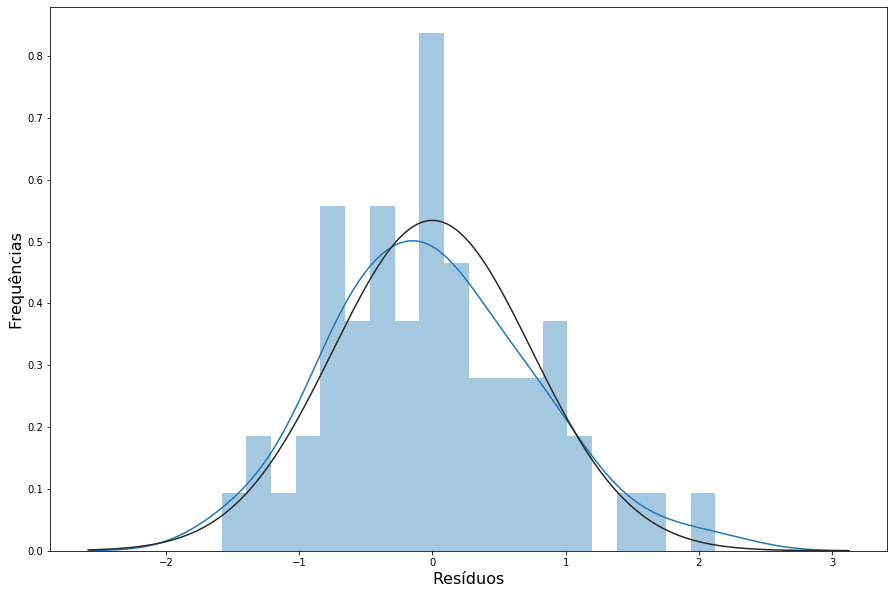

In [93]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_mult_all2.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [94]:
summary_col([modelo, modelo_step_mult, modelo_step_mult_all2],
            model_names=["SIMPLES","MULTIPLA","MULTIPLA_ALL"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,SIMPLES,MULTIPLA,MULTIPLA_ALL
Intercept,422.7535*,6.6909***,-8.8026***
,(245.4723),(1.7228),(1.6415)
conjuntivite,,,0.0254***
,,,(0.0071)
coriza,,0.0176**,0.0244***
,,(0.0076),(0.0085)
exantema_maculopapular,,-0.0249**,
,,(0.0118),
febre,,,-0.0285***
,,,(0.0069)


In [23]:

# df['yhat_simples'] = modelo.fittedvalues
# df['yhat_step_mult_bc'] = (modelo_step_mult.fittedvalues * lmbda + 1) ** (1 / lmbda)
df['yhat_step_mult_all_bc2'] = (modelo_step_mult_all2.fittedvalues * lmbda + 1) ** (1 / lmbda)

In [24]:
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres,bc_numberCases,yhat_step_mult_bc,yhat_step_mult_all_bc,yhat_step_mult_all_bc2
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,40.0,0.0,100.0,10.0,101971173,106523727,2.765328,302.109114,20.194273,47.311574
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,39.0,0.0,100.0,10.0,101971173,106523727,4.450560,86.350165,52.078347,113.831586
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,40.4,0.0,100.0,10.0,101971173,106523727,4.431396,194.896998,649.906633,1473.908280
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,41.9,-4.3,100.0,11.0,101971173,106523727,5.180478,129.287367,386.902086,598.236470
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,38.1,-5.1,100.0,8.0,101971173,106523727,5.951730,510.484082,505.690097,467.727038
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,43.3,-2.8,100.0,10.0,101971173,106523727,6.344923,775.480099,688.874214,265.138297
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,40.0,-5.7,100.0,6.0,101971173,106523727,6.075227,583.871178,1235.209654,548.985428
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,44.7,-5.2,100.0,5.0,101971173,106523727,5.260932,240.540083,606.497771,420.246346
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,45.0,-6.2,100.0,7.0,101971173,106523727,4.574376,2518.589452,272.828457,440.110537
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,45.0,0.4,100.0,10.0,101971173,106523727,3.504466,44.587051,69.173842,80.966845


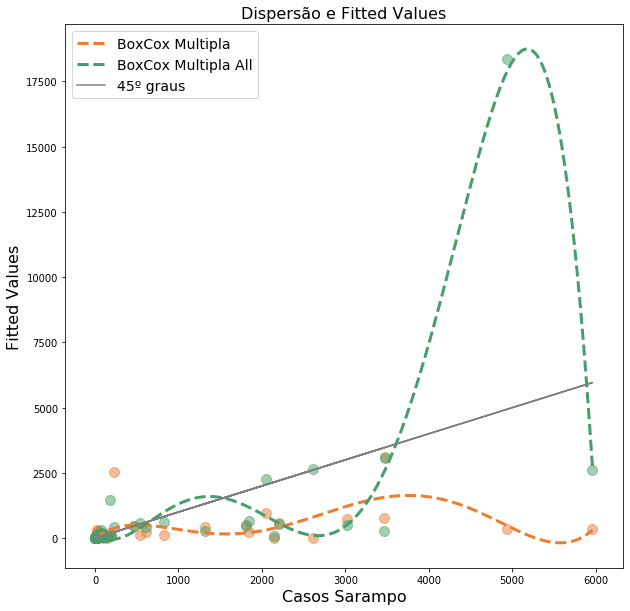

In [109]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df['numberCases']
# ydata_simp = df['yhat_simples']
ydata_mult = df['yhat_step_mult_bc']
ydata_mult_all2 = df['yhat_step_mult_all_bc2']

plt.figure(figsize=(10,10))

# popt, _ = curve_fit(objective, xdata, ydata_simp)
# a, b, c, d, e, f = popt
# x_line = np.arange(min(xdata), max(xdata), 1)
# y_line = objective(x_line, a, b, c, d, e, f)
# plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult_all2)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#469e6a', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
# plt.scatter(xdata,ydata_simp, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_mult, alpha=0.5, s=100, color='#ed7d31')
plt.scatter(xdata,ydata_mult_all2, alpha=0.5, s=100, color='#469e6a')
plt.xlabel('Casos Sarampo', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['BoxCox Multipla','BoxCox Multipla All','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [98]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['sarampo','febre','coriza','conjuntivite','manchas_vermelhas_no_corpo','triplice_viral_d2','mortal_idade_1a4anos','temp_min']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

,VIF,Tolerance
const,236.925596,0.004221
sarampo,2.124204,0.470764
febre,2.216974,0.451065
coriza,3.556173,0.281201
conjuntivite,2.113978,0.473042
manchas_vermelhas_no_corpo,1.659793,0.602485
triplice_viral_d2,2.723637,0.367156
mortal_idade_1a4anos,2.004535,0.498869
temp_min,1.827196,0.547287


In [99]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade


# Criação da função 'breusch_pagan_test'

from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value


# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_mult_all2)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!

chisq: 0.015728789902024906
p-value: 6.312144647127471


(0.015728789902024906, 6.312144647127471)

In [ ]:
#Reportar modelos 
# modelo_step_mult: bc_numberCases ~ coriza + exantema_maculopapular + manchas_de_Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas
# modelo_step_mult_all2: bc_numberCases ~ sarampo + febre + coriza + conjuntivite + manchas_vermelhas_no_corpo + triplice_viral_d2 + mortal_idade_1a4anos + temp_min

#Usar modelo_step_mult_all2

In [ ]:
#TCC
#Como foi feito o modelo
#1. Selecao de variavies (sarampo e sintomas)
#2. Teste F p<0.05
#3. Teste t por Beta p<0.05
#4. Stepwise (remove vars)
#5. Teste normalidade dos erros p<0.05
#6. Multicolinearidade Tolerance ~ 1
#7. Hetrocedasticidade p<0.05 (ruim)

#Discussao: eh possivel um modelo para prever sarampo, mas, conforme visto pelo teste de Heterocedasticidade, muitas variavieis
#foram deixadas de fora, sendo necessario buscar mais variaveis (mais sintomas + dados de vacina e sociodemograficos)

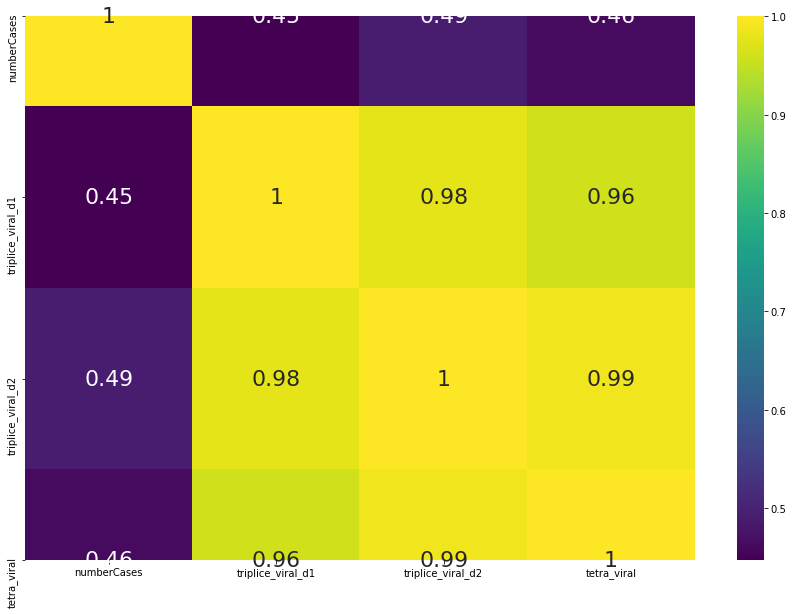

In [25]:
df_corr = df[['numberCases','triplice_viral_d1','triplice_viral_d2','tetra_viral']]
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

In [26]:
corr

,numberCases,triplice_viral_d1,triplice_viral_d2,tetra_viral
numberCases,1.000000,0.447600,0.492375,0.463288
triplice_viral_d1,0.447600,1.000000,0.977114,0.960487
triplice_viral_d2,0.492375,0.977114,1.000000,0.987655
tetra_viral,0.463288,0.960487,0.987655,1.000000


In [28]:
df_corr

,numberCases,triplice_viral_d1,triplice_viral_d2,tetra_viral
0,21,92.61,76.89,33.26
1,189,92.61,76.89,33.26
2,184,92.61,76.89,33.26
3,544,92.61,76.89,33.26
4,1808,92.61,76.89,33.26
5,3463,92.61,76.89,33.26
6,2211,92.61,76.89,33.26
7,614,92.61,76.89,33.26
8,225,92.61,76.89,33.26
9,53,92.61,76.89,33.26


In [29]:
df = df.drop('yhat_step_mult_all_bc',axis=1)
df

,anomes,numberCases,anomes_real,ano,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,...,temp_avg,temp_max,temp_min,hum_max,hum_min,total_pop_homens,total_pop_mulheres,bc_numberCases,yhat_step_mult_bc,yhat_step_mult_all_bc2
0,201801,21,201802,2018,2.25,30.75,58.75,42.50,28.75,0.00,...,24.886737,40.0,0.0,100.0,10.0,101971173,106523727,2.765328,302.109114,47.311574
1,201802,189,201803,2018,4.25,34.00,23.25,52.75,43.50,0.00,...,24.351927,39.0,0.0,100.0,10.0,101971173,106523727,4.450560,86.350165,113.831586
2,201803,184,201804,2018,8.25,48.25,13.25,63.50,86.50,12.50,...,24.865532,40.4,0.0,100.0,10.0,101971173,106523727,4.431396,194.896998,1473.908280
3,201804,544,201805,2018,6.80,70.00,10.80,83.00,50.40,0.00,...,23.658929,41.9,-4.3,100.0,11.0,101971173,106523727,5.180478,129.287367,598.236470
4,201805,1808,201806,2018,4.50,89.75,8.50,83.75,26.50,13.50,...,22.121276,38.1,-5.1,100.0,8.0,101971173,106523727,5.951730,510.484082,467.727038
5,201806,3463,201807,2018,5.50,90.50,7.50,85.00,19.75,14.75,...,21.039745,43.3,-2.8,100.0,10.0,101971173,106523727,6.344923,775.480099,265.138297
6,201807,2211,201808,2018,54.40,85.80,6.80,74.40,18.80,0.00,...,21.321536,40.0,-5.7,100.0,6.0,101971173,106523727,6.075227,583.871178,548.985428
7,201808,614,201809,2018,50.75,67.75,6.25,70.75,18.50,0.00,...,21.806076,44.7,-5.2,100.0,5.0,101971173,106523727,5.260932,240.540083,420.246346
8,201809,225,201810,2018,11.80,68.60,6.60,63.20,20.00,9.60,...,23.801683,45.0,-6.2,100.0,7.0,101971173,106523727,4.574376,2518.589452,440.110537
9,201810,53,201811,2018,7.00,56.25,6.75,54.00,20.25,25.00,...,24.665965,45.0,0.4,100.0,10.0,101971173,106523727,3.504466,44.587051,80.966845


In [30]:
df.to_csv('modelos_finais.csv')